<a href="https://colab.research.google.com/github/pedro-varela1/ControlSystemsII_ControlAMPOPS/blob/main/Projeto_UNIII_Sistemas_de_Controle_II-CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3


































<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

## <center> PROJETO 3ª UNIDADE - SISTEMAS DE CONTROLE II  </center>


Arquivo destinado a implementação do projeto de controle utilizando os métodos de realimentação de saída e realimentação de estados. A ideia consiste no controle de tensão de saída de um sistema de amplificadores operacionais (AMPOPs) ligados em cascata.

---



> Discentes:





* [Douglas Wilian Lima Silva](https://github.com/Douglas-Wilian)
* Jeffet Matheus Cardoso da Silva
* [Gutembergue Ferreira da Silva](https://github.com/GutembergueFerreira)
* [Pedro Artur Fernandes Varela de Lira](https://github.com/pedro-varela1)
* [Roger José Zacarias da Conceição](https://github.com/rogerdox)



> Docente:

* Gabriel Pereira de Oliveira

---







> APRESENTAÇÃO DO PROBLEMA



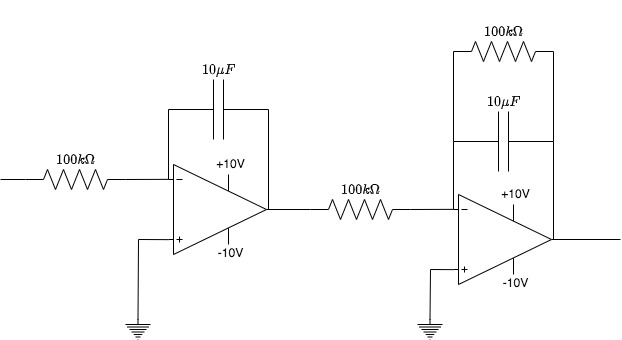

Observa-se a presença de dois amplificadores operacionais ligados em cascata. O primeiro deles, montado como um integrador inversor ideal, enquanto o segundo, montado como um integrador passa baixas.




> MODELAGEM DO SISTEMA







Analisando o primeiro AMPOP na frequência, temos um amplificador inversor:

$V_A(s) = -\dfrac{X_c}{R_A}V_i(s) \implies V_A(s) = -\dfrac{\frac{1}{sC_A}}{R_A}V_i(s) \implies V_A(s) = -\dfrac{1}{R_AC_As}V_i(s)$


A saída do segundo será:

$V_o(s) = -\dfrac{1}{R_{B1}}\left(\dfrac{1}{\frac{1}{R_{B2}}+ \frac{1}{X_B}} \right)V_A(s) \implies V_o(s) = -\dfrac{1}{\frac{R_{B1}}{R_{B2}}+ \frac{R_{B1}}{X_B}} V_A(s) $

Logo:

$V_o(s) = \dfrac{1}{1 + 100K \cdot 10\mu s} \dfrac{1}{100k\cdot 10\mu s} V_i(s)$

Assim:

$V_o(s) = \dfrac{1}{s(s+1)}V_i(s)$

Então:

\begin{align*}
G(s) = \dfrac{1}{s(s+1)}
\end{align*}

## Cenário 1



> REALIMENTAÇÃO DE SAÍDA



Como temos um sistema de tipo 1 já não temos erro de regime.

Fechando a malha:

$G_f(s) = \dfrac{1}{s^2 + s + 1}$

Logo, observamos que $\omega_n = 1$ e $\xi = \frac{1}{2}$, fazendo com que:

$T_{s2\%} = \dfrac{4}{\xi \omega_n} \implies \dfrac{4}{0,5} \implies T_{s2\%} = 8 \,\,s$

De mesma maneira, o percentual de overshoot será:

$PO(\%) = e^{\dfrac{-\xi\pi}{\sqrt{1-\xi^2}}}\cdot 100 \implies PO(\%) = 16,3033 \,\,\%$


Precisamos de um controlador Proporcional Derivativo.

$G_c(s) = K_c(1 + T_Ds)$



Para atender os requisitos precisamos que:

$T_{s2\%} = \dfrac{4}{\xi \omega_n} \implies 2 = \dfrac{4}{0,5\omega_n}  \implies \omega_n = 4$


Logo:

$a^*(s) = s^2 + 4s + 16 $

Usando a equação diofantina temos:

$s^2 + s + K_c + K_cT_Ds = s^2 + 4s + 16 \implies s^2 + s(1+K_cT_D) + K_c = s^2 + 4s + 16$

$K_c = 16 \,\,e \,\, T_D = 0,1875$.


O controlador será:

\begin{align*}
G_c(s) = 3s + 16
\end{align*}

In [ ]:
!pip install control

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control as ctl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 8.8 MB/s eta 0:00:00


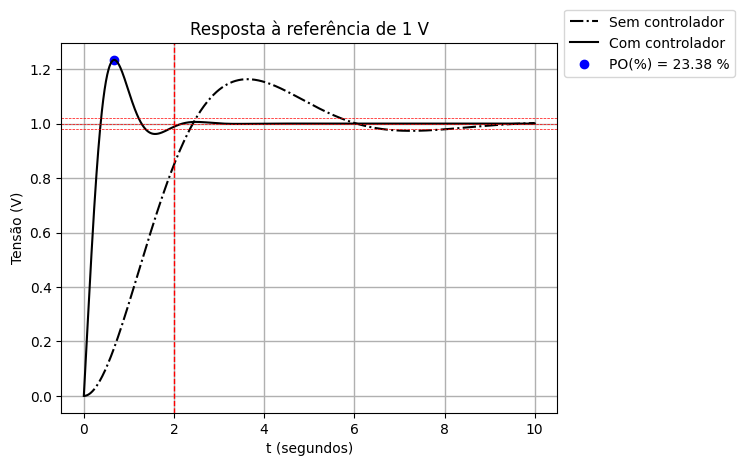

In [ ]:
def plot_response(numGpd=[1], denGpd=[1, 1, 0], numGc=[3, 16], denGc=[1], T_sim=20, REFERENCE=1):
  # Modelo da planta
  sysGpd = ctl.tf(numGpd, denGpd)
  sysGc = ctl.tf(numGc, denGc)

  # Modelo da realimentação unitária
  sysR = ctl.tf([1], [1])

  # Feedback sem o controlador
  sysFBs = ctl.feedback(sysGpd, sysR)

  #Com controlador
  sysFBc = ctl.feedback(sysGc, sysR)

  tx = np.linspace(0, T_sim, 1000)  # Pontos da simulação
  u = REFERENCE * np.ones_like(tx)  # Referencia constante de 15cm

  t, h = ctl.forced_response(sysFBs, tx, u)
  plt.plot(t, h, color='black', linestyle = 'dashdot', label='Sem controlador')
  ### Plotagem da resposta à entrada de tensão com a realimentação e sem o controlador


  ### Plotagem da resposta à entrada de tensão com o controlador
  t, h = ctl.forced_response(sysFBc, tx, u)


  plt.plot(t, h, color='black', label=f'Com controlador')

  #### Eixos do gráfico
  plt.xlabel('t (segundos)')
  plt.ylabel('Tensão (V)')
  plt.title(f'Resposta à referência de {REFERENCE} V')

  ESTAB = 1
  plt.axhline(y=ESTAB, color='red', linestyle='--', lw=0.5)
  plt.axhline(y=ESTAB*1.02, color='red', linestyle='--', lw=0.5)
  plt.axhline(y=ESTAB*0.98, color='red', linestyle='--', lw=0.5)
  plt.axvline(x = 2, color = 'red', linestyle='--', lw=1)
  plt.scatter(x = t[np.where(h == max(h))], y=max(h), color = 'blue', label = f'PO(%) = {(max(h) - 1)*100:.2f} %')

  #### Plotagem do gráfico
  plt.legend(bbox_to_anchor=(1.0, 1.0), loc='center left')
  plt.grid(linewidth=1)
  plt.savefig('Resposta_a_referencia.png', dpi = 600)
  plt.show()


numerator = [1]  # Numerador da função de transferência
denominator = [1, 1, 0]  # Denominador da função de transferência

# Defina a função de transferência G(s)
numeratorgc = [3, 16]  # Numerador da função de transferência
denominatorgc = [1,1,0]  # Denominador da função de transferência
plot_response(numGpd = numerator, denGpd = denominator, numGc = numeratorgc, denGc=denominatorgc, T_sim = 10)

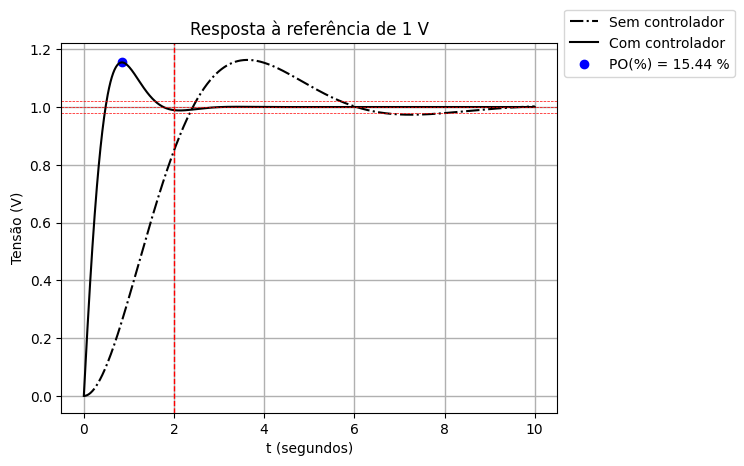

In [ ]:
# Ajustes dos parâmetros

numerator = [1]  # Numerador da função de transferência
denominator = [1, 1, 0]  # Denominador da função de transferência

# Defina a função de transferência G(s)
numeratorgc = [3, 10]  # Numerador da função de transferência
denominatorgc = [1,1,0]  # Denominador da função de transferência
plot_response(numGpd = numerator, denGpd = denominator, numGc = numeratorgc, denGc=denominatorgc, T_sim = 10)

Nota-se que, para a simulação laboratorial, é necessária a implementação do controlador utilizando os AMPOPs. Dessa maneira, é preciso dimensionar os capacitores e resistores que serão utilizados para a construção controle em laboratório.

Usando o material disponibilizado, temos:

$3s + 10 = \dfrac{R_4}{R_3}\dfrac{R_2}{R_1}(R_1 C_1s + 1)$

$\dfrac{R_4R_2}{R_3} C_1 = 3$

$\dfrac{R_4}{R_3}\dfrac{R_2}{R_1} = 10$

Supondo um capacitor de $10\mu$:

$\dfrac{R_4R_2}{R_3} = 3 \times 10^5$

Uma solução possível: $R_1 = 30k, \,\, R_2 = 100k, \,\, R_3 = 10k, \,\, R_4 = 30k, \,\, C_1 = 10\mu$.

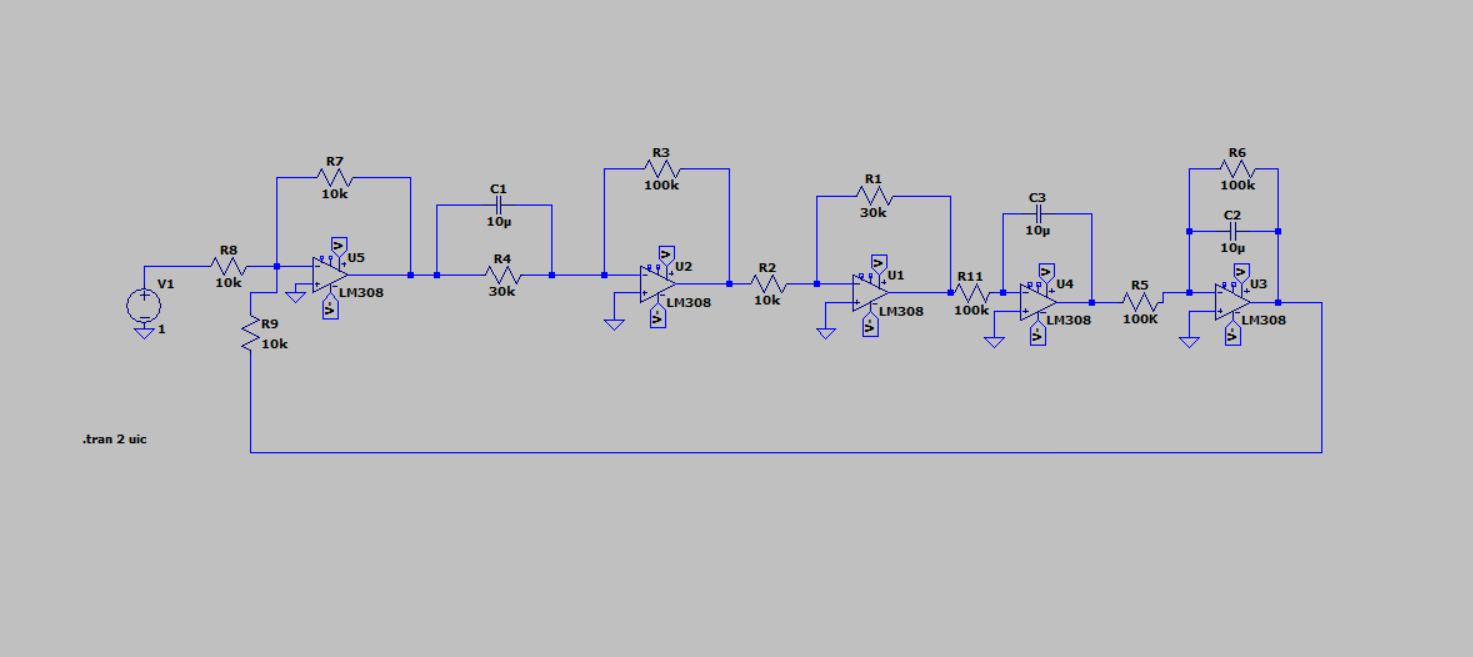

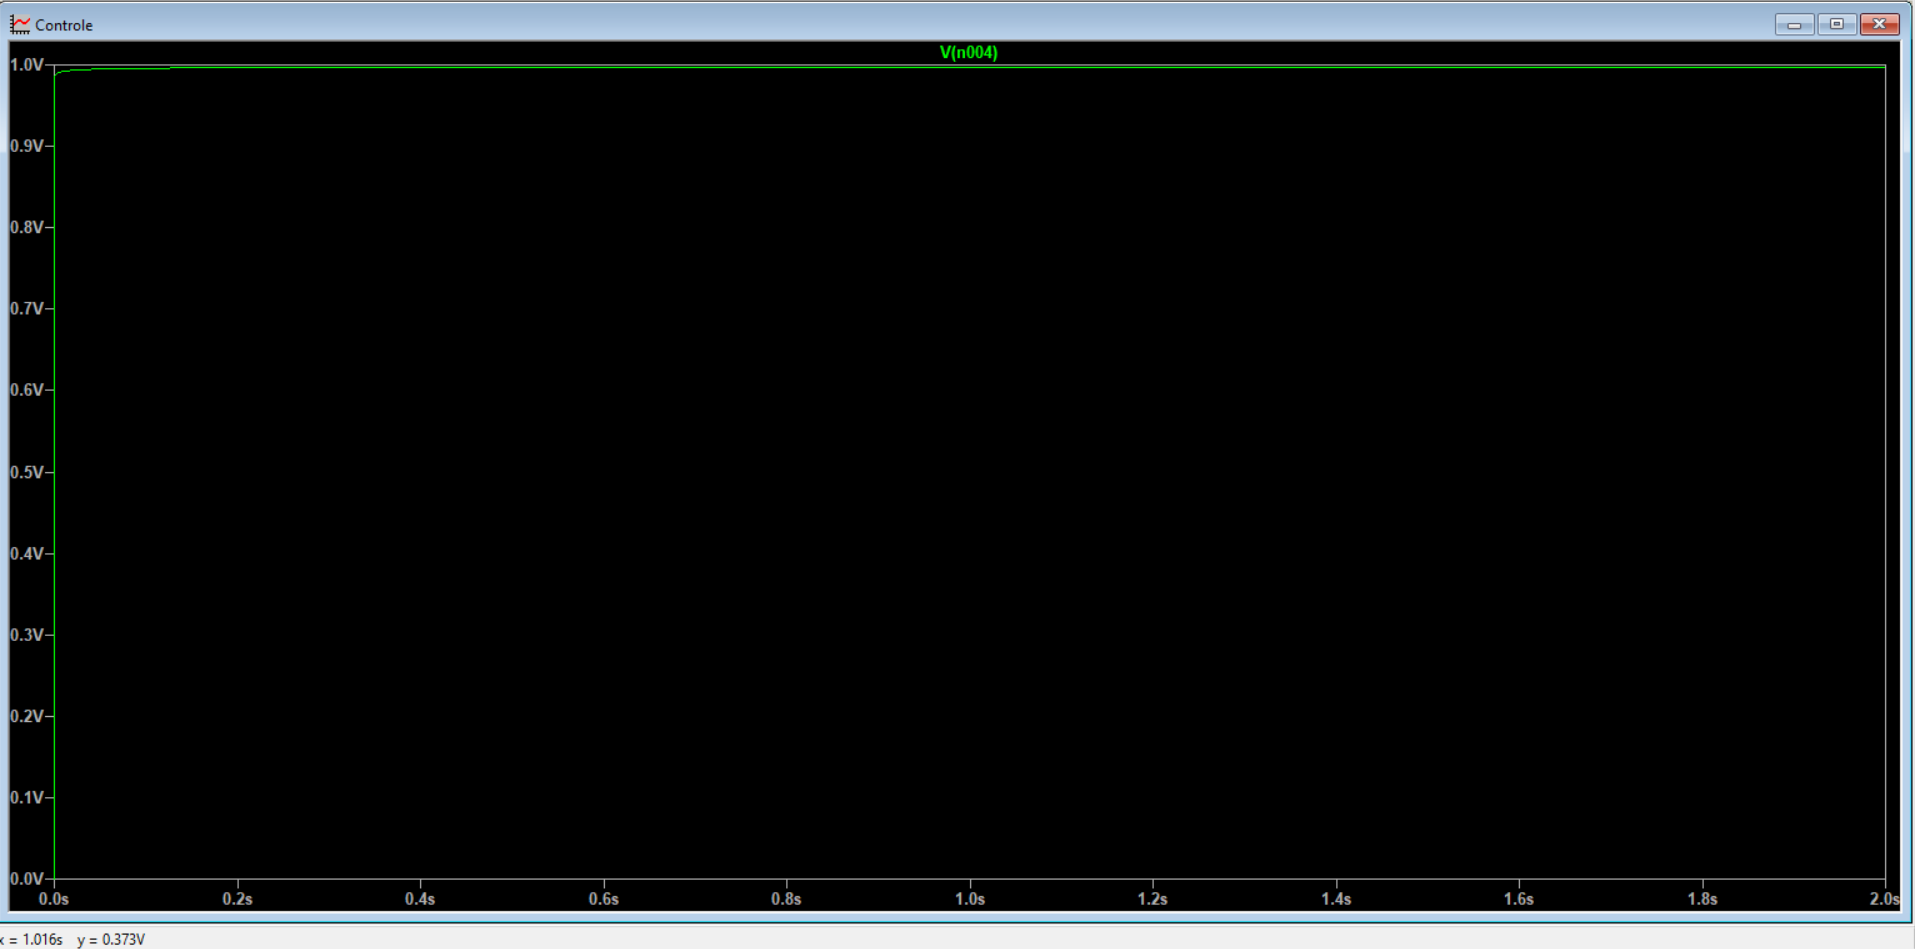

## Cenário 2

> REPRESENTAÇÃO EM ESPAÇO DE ESTADOS

Para se estabelecer um controlador baseado em realimentação de estados, é necessário representar a dinâmica dada pela função de transferência $G(s)$ em espaços de estados dado por:

$\dot{x}(t) = Ax(t) + Bu(t)$

$y(t) = Cx(t)$

Onde $y(t)$ é a saída, $x(t)$ é o vator de estado e $u(t)$ é a entrada.

As matrizes A, B e C são dadas por:

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define the coefficients of the transfer function
numerator = [1]
denominator = [1, 1, 0]

# Convert transfer function coefficients to state-space representation
A, B, C, D = signal.tf2ss(numerator, denominator)

# Display the state-space matrices
print("A matrix:")
print(A)
print("\nB matrix:")
print(B)
print("\nC matrix:")
print(C)
print("\nD matrix:")
print(D)

A matrix:
[[-1. -0.]
 [ 1.  0.]]

B matrix:
[[1.]
 [0.]]

C matrix:
[[0. 1.]]

D matrix:
[[0.]]


 A = \begin{bmatrix}
-1 & 0 \\
1 & 0
\end{bmatrix}

B = \begin{bmatrix}
1 \\
0
\end{bmatrix}

 C = \begin{bmatrix}
0 & 1
\end{bmatrix}

Pode-se representar o sistema através do seguinte diagrama de blocos:

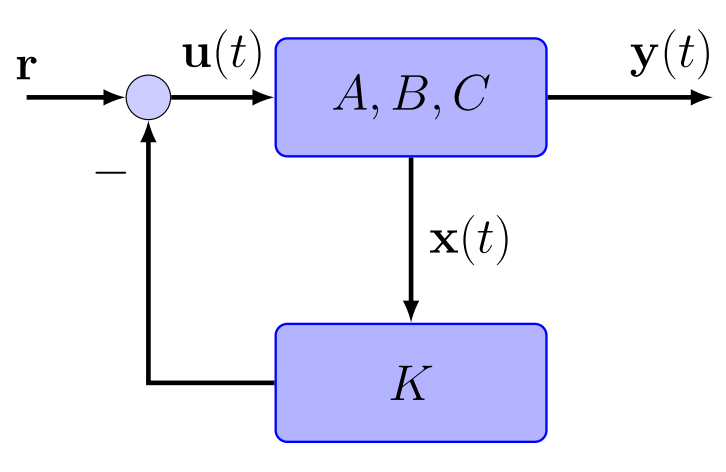

Sendo a dinâmica de caminho fechado tal que:

$\dot{x}(t) = A_{cl}x(t) + Br$

$y(t) = Cx(t)$

Com o controlador $K$ utilizado para impor um $A_{cl}$ que possuas as propriedades desejadas, já que $A_{cl} = (A - BK)$.

Temos então:

$A_{cl} = (A - BK) = \begin{bmatrix}
-1 & 0 \\
1 & 0
\end{bmatrix} - \begin{bmatrix}
1 \\
0
\end{bmatrix} \begin{bmatrix}
k_1 & k_2
\end{bmatrix} = \begin{bmatrix}
-1-k_1 & -k_2 \\
1 & 0
\end{bmatrix}$

Resultando em: $det(sI - A_{cl}) = s^2+(k_1+1)s-k_2 = 0$.

Anteriormente, vimos que precisaríamos de $a^*(s) = s^2 + 4s + 16 $ para atender as especificações de $T_{s2\%} \leq  2s$ e $PO(\%) = 16,3033 \,\,\%$.

Então, têm-se:
$s^2+(k_1+1)s+k_2 = s^2 + 4s + 16 = 0$

Portanto: $k_1 = 3$ e $k_2 = 16$.

Outra opção para encontrar a matriz de ganho do controlador é utilizar a função  ``` place_poles(A, B, polos_desejados).gain_matrix``` da biblioteca _scipy_.




In [ ]:
A = np.array([[-1, 0], [1, 0]])
B = np.array([[1], [0]])

polos_desejados = [-2+3.4641016j, -2-3.4641016j]

K = signal.place_poles(A, B, polos_desejados).gain_matrix

print("Matriz de ganho do controlador K:")
print(K)

Matriz de ganho do controlador K:
[[ 3.        15.9999999]]


Por fim, têm-se a análise do comportamento temporal da saída:

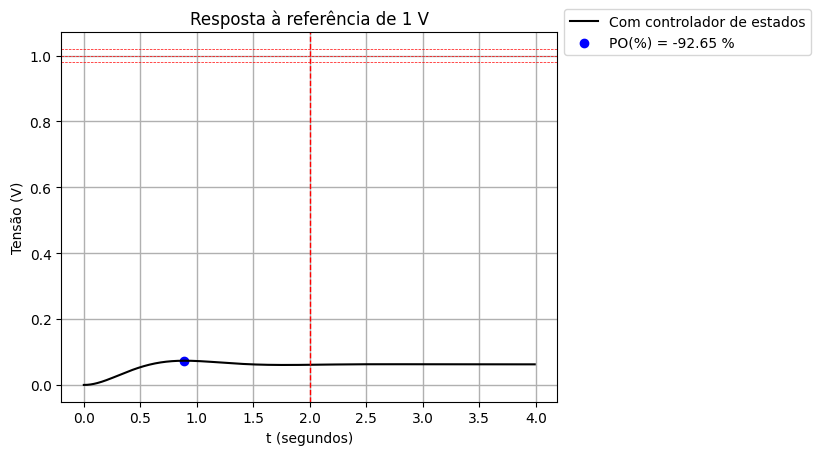

In [ ]:
A = np.array([[-1, 0], [1, 0]])
B = np.array([[1], [0]])
C = np.array([[0, 1]])
K = np.array([[3, 16]])

# Função para simulação do sistema com realimentação de estados
def simulate_system(A, B, C, K, reference_level, time_end, dt):
    time = np.arange(0, time_end, dt)  # Vetor de tempo
    num_steps = len(time)
    x = np.zeros((A.shape[0], 1))
    y_values = []

    for i in range(num_steps):
        # Cálculo do sinal de controle u(t) = -Kx(t)
        u = reference_level-np.dot(K, x)

        # Cálculo da saída do sistema y(t) = Cx(t)
        y = np.dot(C, x)
        y_values.append(y[0])  # Armazenar a saída em cada passo de tempo
        # Simulação do comportamento do sistema dinâmico (x_dot = Ax + Bu)
        x_dot = np.dot(A, x) + np.dot(B, u)

        x = x + x_dot * dt  # Atualização do vetor de estados usando o método de Euler

    y_values = np.concatenate(y_values)
    plt.plot(time, y_values, color='black', label=f'Com controlador de estados')

    #### Eixos do gráfico
    plt.xlabel('t (segundos)')
    plt.ylabel('Tensão (V)')
    plt.title(f'Resposta à referência de {reference_level} V')

    ESTAB = reference_level
    plt.axhline(y=ESTAB, color='red', linestyle='--', lw=0.5)
    plt.axhline(y=ESTAB*1.02, color='red', linestyle='--', lw=0.5)
    plt.axhline(y=ESTAB*0.98, color='red', linestyle='--', lw=0.5)
    plt.axvline(x = 2, color = 'red', linestyle='--', lw=1)
    plt.scatter(x = time[np.where(y_values == max(y_values))], y=max(y_values), color = 'blue', label = f'PO(%) = {(max(y_values) - 1)*100:.2f} %')

    #### Plotagem do gráfico
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='center left')
    plt.grid(linewidth=1)
    plt.savefig('Resposta_a_referencia.png', dpi = 600)
    plt.show()

# Parâmetros para a simulação
reference_level = 1
time_end = 4
dt = 0.01

# Simulação do sistema com realimentação de estados
simulate_system(A, B, C, K, reference_level, time_end, dt)


Vamos dar um ganho de 16 na saída e modificar o elemento $k_2$ do controlador para $16.21$.

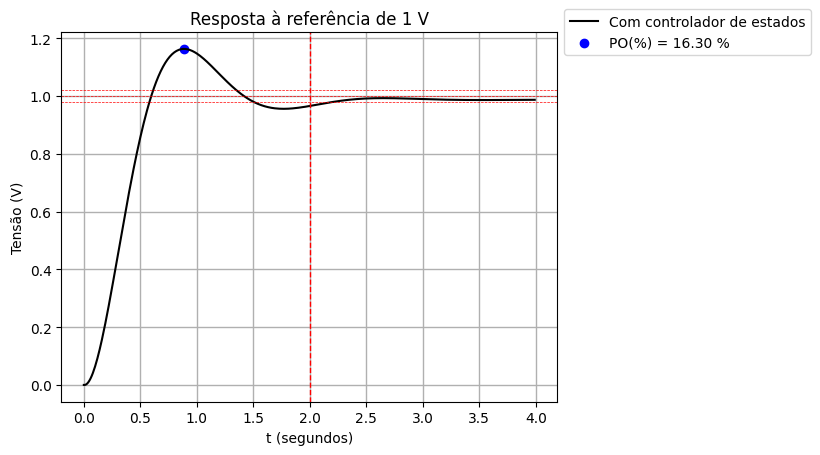

In [ ]:
A = np.array([[-1, 0], [1, 0]])
B = np.array([[1], [0]])
C = np.array([[0, 1]])
K = np.array([[3, 16.21]])

# Função para simulação do sistema com realimentação de estados
def simulate_system(A, B, C, K, reference_level, time_end, dt):
    time = np.arange(0, time_end, dt)  # Vetor de tempo
    num_steps = len(time)
    x = np.zeros((A.shape[0], 1))
    y_values = []

    for i in range(num_steps):
        # Cálculo do sinal de controle u(t) = -Kx(t)
        u = reference_level-np.dot(K, x)

        # Cálculo da saída do sistema y(t) = Cx(t)
        y = np.dot(C, x)
        y_values.append(y[0]*16)  # Armazenar a saída em cada passo de tempo
        # Simulação do comportamento do sistema dinâmico (x_dot = Ax + Bu)
        x_dot = np.dot(A, x) + np.dot(B, u)

        x = x + x_dot * dt  # Atualização do vetor de estados usando o método de Euler

    y_values = np.concatenate(y_values)
    plt.plot(time, y_values, color='black', label=f'Com controlador de estados')

    #### Eixos do gráfico
    plt.xlabel('t (segundos)')
    plt.ylabel('Tensão (V)')
    plt.title(f'Resposta à referência de {reference_level} V')

    ESTAB = reference_level
    plt.axhline(y=ESTAB, color='red', linestyle='--', lw=0.5)
    plt.axhline(y=ESTAB*1.02, color='red', linestyle='--', lw=0.5)
    plt.axhline(y=ESTAB*0.98, color='red', linestyle='--', lw=0.5)
    plt.axvline(x = 2, color = 'red', linestyle='--', lw=1)
    plt.scatter(x = time[np.where(y_values == max(y_values))], y=max(y_values), color = 'blue', label = f'PO(%) = {(max(y_values) - 1)*100:.2f} %')

    #### Plotagem do gráfico
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='center left')
    plt.grid(linewidth=1)
    plt.savefig('Resposta_a_referencia.png', dpi = 600)
    plt.show()

# Parâmetros para a simulação
reference_level = 1
time_end = 4
dt = 0.01

# Simulação do sistema com realimentação de estados
simulate_system(A, B, C, K, reference_level, time_end, dt)

Agora, é possível visualizar o controle dentro dos métricas especificados.